# Imports

In [2]:
import numpy as np
import pandas as pd

from scipy.spatial.distance import euclidean, cdist
from sklearn.preprocessing import StandardScaler

from keras.preprocessing import sequence
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from keras.optimizers import Adam
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

import matplotlib.pyplot as plt

C:\Users\Kaushik\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Load the data

## UK

In [12]:
uk_2014 = pd.read_csv("../Data/Yearly/UK_2014.csv", skiprows=2)
uk_2014['Week'] = pd.to_datetime(uk_2014['Week'], infer_datetime_format=True)
uk_2014 = uk_2014.set_index(['Week'])
uk_2014.sort_index(inplace=True)
print(uk_2014.dtypes)

what is vaping: (United Kingdom)    int64
is vaping safe: (United Kingdom)    int64
vaping shop: (United Kingdom)       int64
vaping device: (United Kingdom)     int64
dtype: object


In [8]:
uk_2015 = pd.read_csv("../Data/Yearly/UK_2015.csv", skiprows=2)
uk_2015['Week'] = pd.to_datetime(uk_2015['Week'], infer_datetime_format=True)
uk_2015 = uk_2015.set_index(['Week'])
uk_2015.sort_index(inplace=True)
print(uk_2015.dtypes)

what is vaping: (United Kingdom)    int64
is vaping safe: (United Kingdom)    int64
vaping shop: (United Kingdom)       int64
vaping device: (United Kingdom)     int64
dtype: object


In [9]:
uk_2016 = pd.read_csv("../Data/Yearly/UK_2016.csv", skiprows=2)
uk_2016['Week'] = pd.to_datetime(uk_2016['Week'], infer_datetime_format=True)
uk_2016 = uk_2016.set_index(['Week'])
uk_2016.sort_index(inplace=True)
print(uk_2016.dtypes)

what is vaping: (United Kingdom)    int64
is vaping safe: (United Kingdom)    int64
vaping shop: (United Kingdom)       int64
vaping device: (United Kingdom)     int64
dtype: object


In [10]:
uk_2017 = pd.read_csv("../Data/Yearly/UK_2017.csv", skiprows=2)
uk_2017['Week'] = pd.to_datetime(uk_2017['Week'], infer_datetime_format=True)
uk_2017 = uk_2017.set_index(['Week'])
uk_2017.sort_index(inplace=True)
print(uk_2017.dtypes)

what is vaping: (United Kingdom)    int64
is vaping safe: (United Kingdom)    int64
vaping shop: (United Kingdom)       int64
vaping device: (United Kingdom)     int64
dtype: object


In [11]:
uk_2018 = pd.read_csv("../Data/Yearly/UK_2018.csv", skiprows=2)
uk_2018['Week'] = pd.to_datetime(uk_2018['Week'], infer_datetime_format=True)
uk_2018 = uk_2018.set_index(['Week'])
uk_2018.sort_index(inplace=True)
print(uk_2018.dtypes)

what is vaping: (United Kingdom)    int64
is vaping safe: (United Kingdom)    int64
vaping shop: (United Kingdom)       int64
vaping device: (United Kingdom)     int64
dtype: object


In [14]:
uk_2019 = pd.read_csv("../Data/Yearly/UK_2019.csv", skiprows=2)
uk_2019['Week'] = pd.to_datetime(uk_2019['Week'], infer_datetime_format=True)
uk_2019 = uk_2019.set_index(['Week'])
uk_2019.sort_index(inplace=True)
print(uk_2019.dtypes)

what is vaping: (United Kingdom)    int64
is vaping safe: (United Kingdom)    int64
vaping shop: (United Kingdom)       int64
vaping device: (United Kingdom)     int64
dtype: object


## USA

In [15]:
usa_2014 = pd.read_csv("../Data/Yearly/USA_2014.csv", skiprows=2)
usa_2014['Week'] = pd.to_datetime(usa_2014['Week'], infer_datetime_format=True)
usa_2014 = usa_2014.set_index(['Week'])
usa_2014.sort_index(inplace=True)
print(usa_2014.dtypes)

what is vaping: (United States)    int64
is vaping safe: (United States)    int64
vaping shop: (United States)       int64
vaping device: (United States)     int64
dtype: object


In [16]:
usa_2015 = pd.read_csv("../Data/Yearly/USA_2015.csv", skiprows=2)
usa_2015['Week'] = pd.to_datetime(usa_2015['Week'], infer_datetime_format=True)
usa_2015 = usa_2015.set_index(['Week'])
usa_2015.sort_index(inplace=True)
print(usa_2015.dtypes)

what is vaping: (United States)    int64
is vaping safe: (United States)    int64
vaping shop: (United States)       int64
vaping device: (United States)     int64
dtype: object


In [17]:
usa_2016 = pd.read_csv("../Data/Yearly/USA_2016.csv", skiprows=2)
usa_2016['Week'] = pd.to_datetime(usa_2016['Week'], infer_datetime_format=True)
usa_2016 = usa_2016.set_index(['Week'])
usa_2016.sort_index(inplace=True)
print(usa_2016.dtypes)

what is vaping: (United States)    int64
is vaping safe: (United States)    int64
vaping shop: (United States)       int64
vaping device: (United States)     int64
dtype: object


In [19]:
usa_2017 = pd.read_csv("../Data/Yearly/USA_2017.csv", skiprows=2)
usa_2017['Week'] = pd.to_datetime(usa_2017['Week'], infer_datetime_format=True)
usa_2017 = usa_2017.set_index(['Week'])
usa_2017.sort_index(inplace=True)
print(usa_2017.dtypes)

what is vaping: (United States)    int64
is vaping safe: (United States)    int64
vaping shop: (United States)       int64
vaping device: (United States)     int64
dtype: object


In [20]:
usa_2018 = pd.read_csv("../Data/Yearly/USA_2018.csv", skiprows=2)
usa_2018['Week'] = pd.to_datetime(usa_2018['Week'], infer_datetime_format=True)
usa_2018 = usa_2018.set_index(['Week'])
usa_2018.sort_index(inplace=True)
print(usa_2018.dtypes)

what is vaping: (United States)    int64
is vaping safe: (United States)    int64
vaping shop: (United States)       int64
vaping device: (United States)     int64
dtype: object


In [21]:
usa_2019 = pd.read_csv("../Data/Yearly/USA_2019.csv", skiprows=2)
usa_2019['Week'] = pd.to_datetime(usa_2019['Week'], infer_datetime_format=True)
usa_2019 = usa_2019.set_index(['Week'])
usa_2019.sort_index(inplace=True)
print(usa_2019.dtypes)

what is vaping: (United States)    int64
is vaping safe: (United States)    int64
vaping shop: (United States)       int64
vaping device: (United States)     int64
dtype: object


# Visualize

## UK

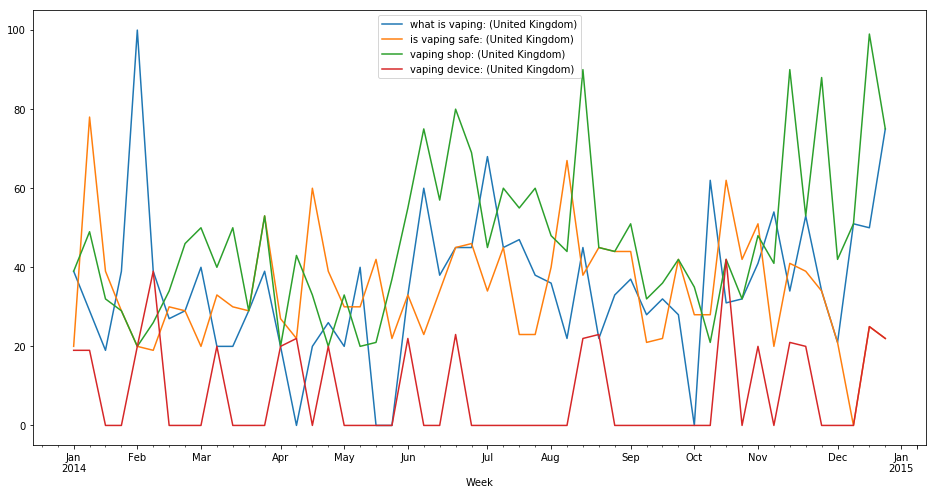

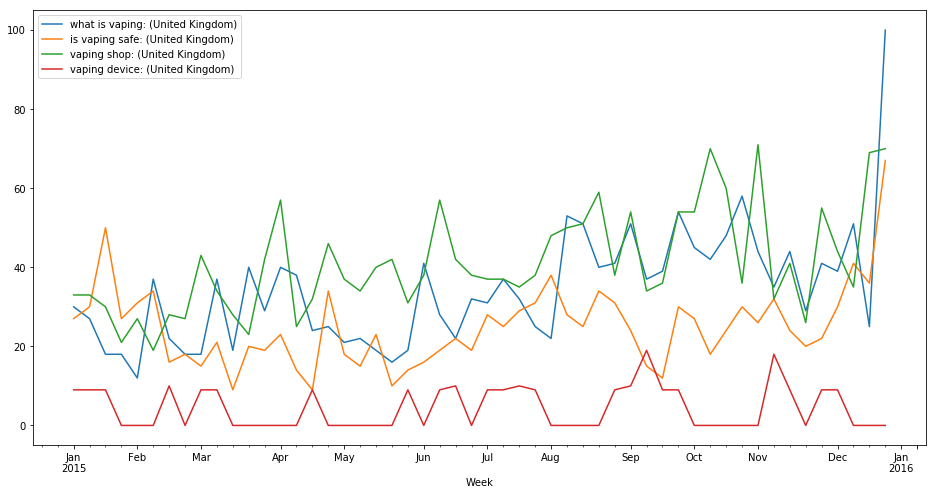

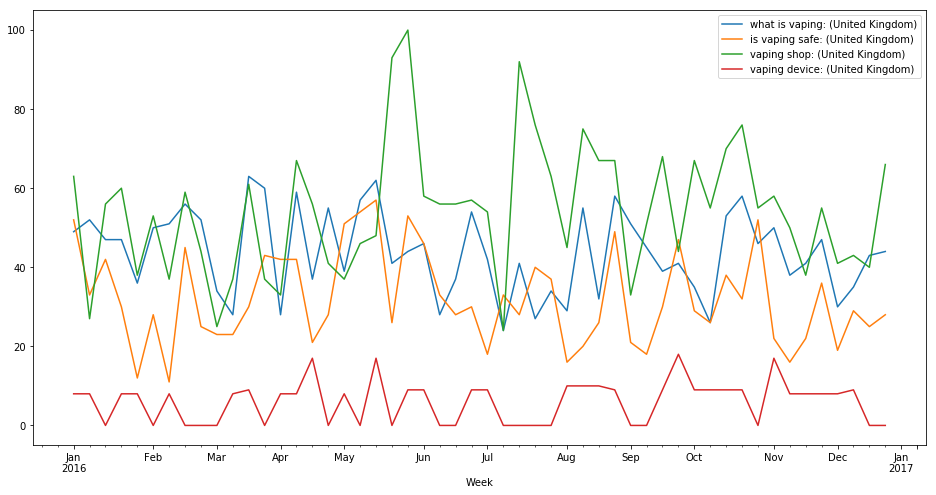

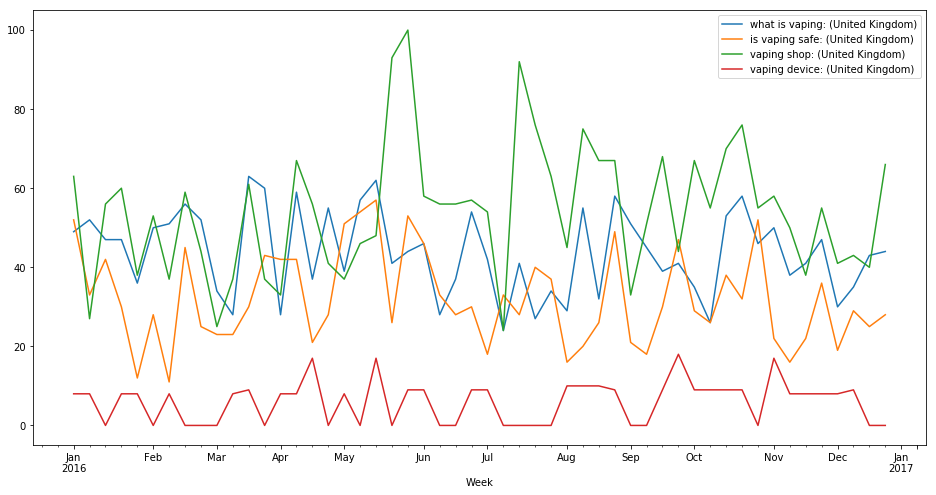

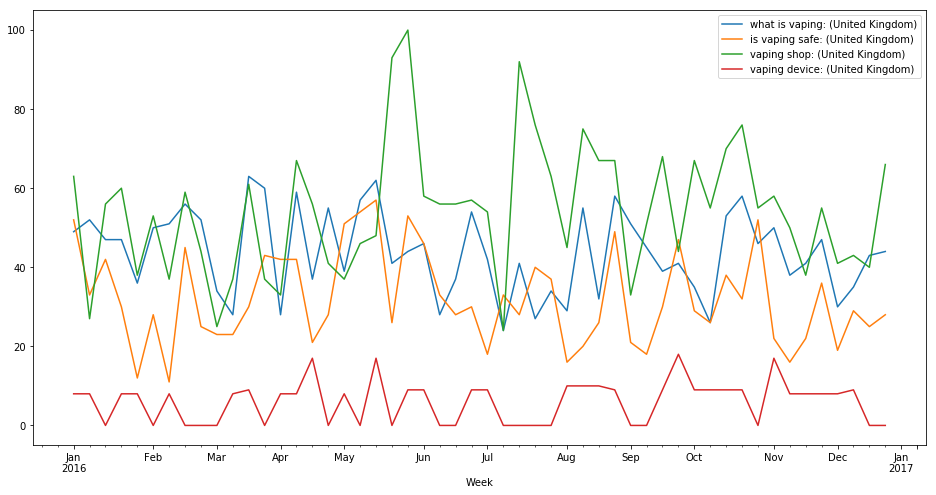

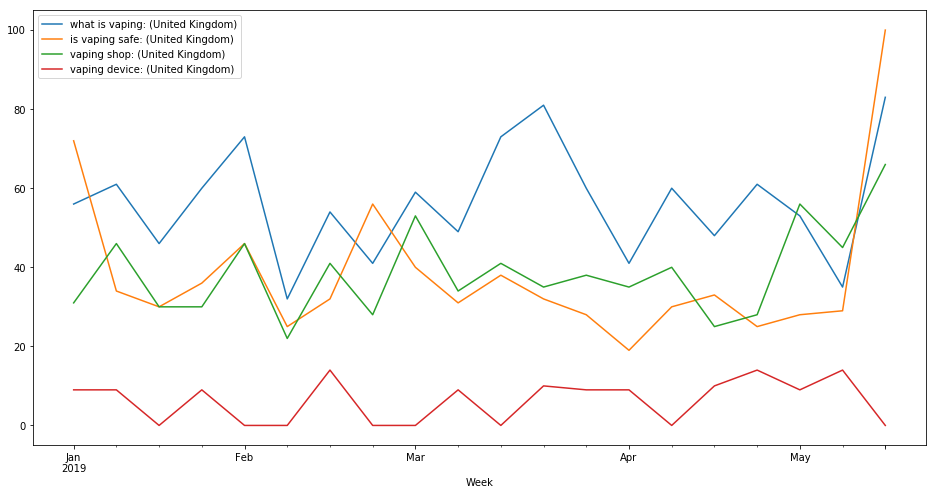

In [22]:
plt.rcParams['figure.figsize'] = (16,8)
uk_2014.plot()
uk_2015.plot()
uk_2016.plot()
uk_2017.plot()
uk_2018.plot()
uk_2019.plot()
plt.legend()
plt.rcParams['figure.figsize'] = (6,4)

## USA

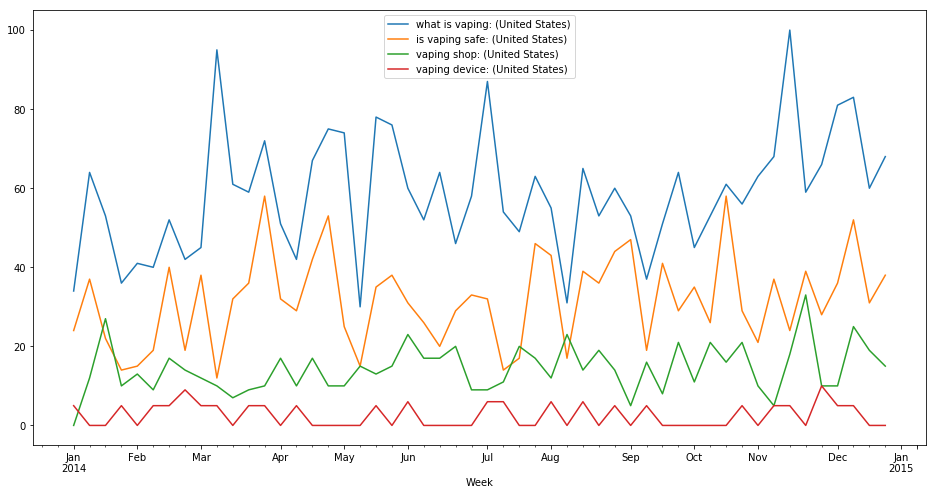

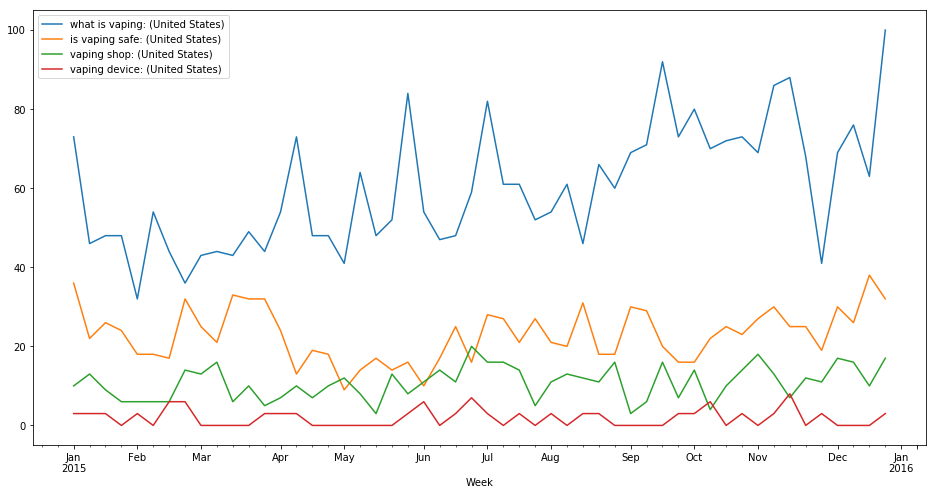

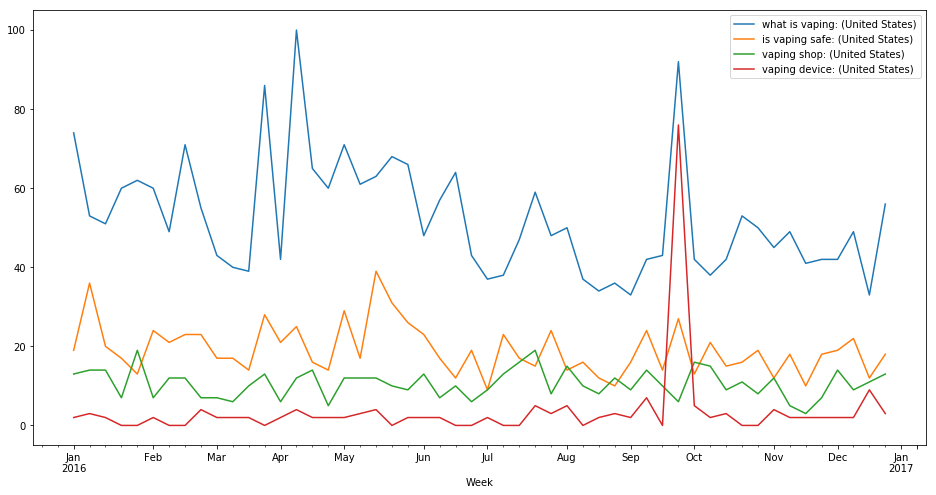

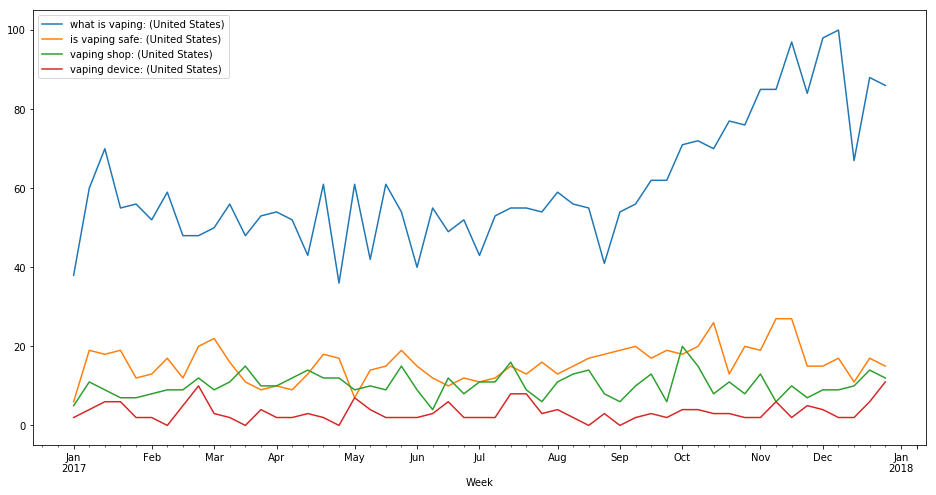

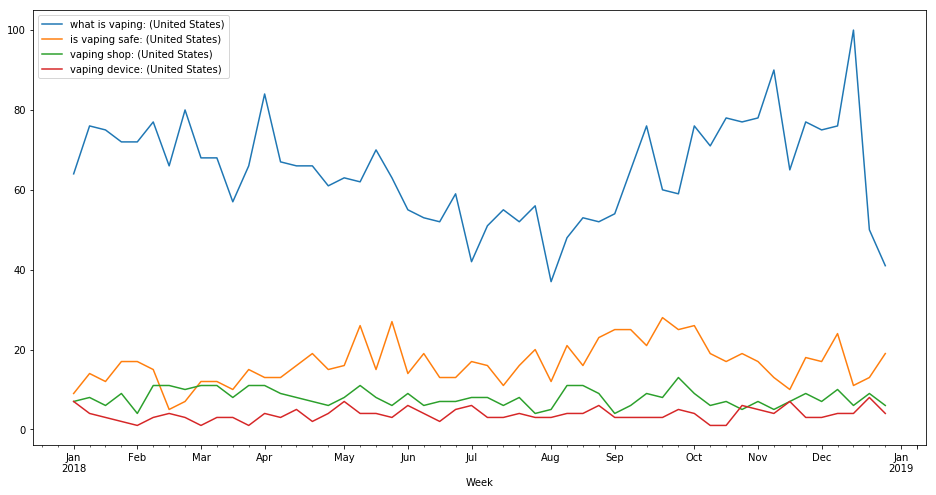

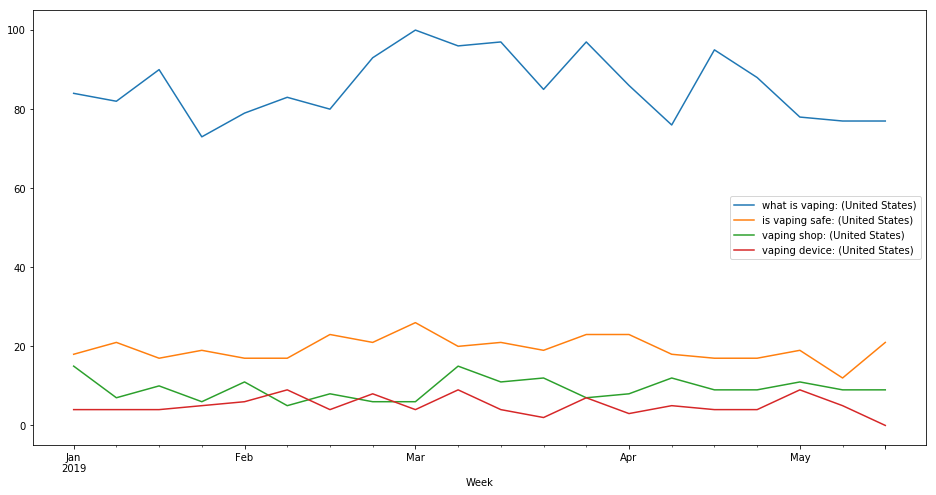

In [32]:
plt.rcParams['figure.figsize'] = (16,8)
usa_2014.plot()
usa_2015.plot()
usa_2016.plot()
usa_2017.plot()
usa_2018.plot()
usa_2019.plot()
plt.legend()
plt.rcParams['figure.figsize'] = (6,4)

# Clustering models

## TimeSeriesKMeans

In [24]:
# https://tslearn.readthedocs.io/en/latest/gen_modules/tslearn.clustering.html

In [23]:
from tslearn.clustering import TimeSeriesKMeans

### UK

In [29]:
uk_2014_mat = uk_2014.values
uk_2015_mat = uk_2015.values
uk_2016_mat = uk_2016.values
uk_2017_mat = uk_2017.values
uk_2018_mat = uk_2018.values
uk_2019_mat = uk_2019.values

all_mat = np.array([uk_2014_mat, uk_2015_mat, uk_2016_mat, uk_2017_mat, uk_2018_mat, uk_2019_mat])
all_mat

array([array([[ 39,  20,  39,  19],
       [ 29,  78,  49,  19],
       [ 19,  39,  32,   0],
       [ 39,  29,  29,   0],
       [100,  20,  20,  20],
       [ 39,  19,  26,  39],
       [ 27,  30,  34,   0],
       [ 29,  29,  46,   0],
       [ 40,  20,  50,   0],
       [ 20,  33,  40,  20],
       [ 20,  30,  50,   0],
       [ 29,  29,  29,   0],
       [ 39,  53,  53,   0],
       [ 20,  27,  20,  20],
       [  0,  22,  43,  22],
       [ 20,  60,  33,   0],
       [ 26,  39,  20,  20],
       [ 20,  30,  33,   0],
       [ 40,  30,  20,   0],
       [  0,  42,  21,   0],
       [  0,  22,  37,   0],
       [ 33,  33,  55,  22],
       [ 60,  23,  75,   0],
       [ 38,  34,  57,   0],
       [ 45,  45,  80,  23],
       [ 45,  46,  69,   0],
       [ 68,  34,  45,   0],
       [ 45,  45,  60,   0],
       [ 47,  23,  55,   0],
       [ 38,  23,  60,   0],
       [ 36,  40,  48,   0],
       [ 22,  67,  44,   0],
       [ 45,  38,  90,  22],
       [ 22,  45,  45,  23],
       

In [31]:
km = TimeSeriesKMeans(n_clusters=2, 
                      metric="dtw", # "softdtw", "euclidean",
                      max_iter=5, verbose=False, random_state=0).fit(all_mat)
print(km.cluster_centers_.shape)
print(km.labels_)

(2, 20, 4)
[0 0 0 0 0 1]


### USA

In [33]:
usa_2014_mat = usa_2014.values
usa_2015_mat = usa_2015.values
usa_2016_mat = usa_2016.values
usa_2017_mat = usa_2017.values
usa_2018_mat = usa_2018.values
usa_2019_mat = usa_2019.values

all_mat = np.array([usa_2014_mat, usa_2015_mat, usa_2016_mat, usa_2017_mat, usa_2018_mat, usa_2019_mat])
all_mat

array([array([[ 34,  24,   0,   5],
       [ 64,  37,  12,   0],
       [ 53,  22,  27,   0],
       [ 36,  14,  10,   5],
       [ 41,  15,  13,   0],
       [ 40,  19,   9,   5],
       [ 52,  40,  17,   5],
       [ 42,  19,  14,   9],
       [ 45,  38,  12,   5],
       [ 95,  12,  10,   5],
       [ 61,  32,   7,   0],
       [ 59,  36,   9,   5],
       [ 72,  58,  10,   5],
       [ 51,  32,  17,   0],
       [ 42,  29,  10,   5],
       [ 67,  42,  17,   0],
       [ 75,  53,  10,   0],
       [ 74,  25,  10,   0],
       [ 30,  15,  15,   0],
       [ 78,  35,  13,   5],
       [ 76,  38,  15,   0],
       [ 60,  31,  23,   6],
       [ 52,  26,  17,   0],
       [ 64,  20,  17,   0],
       [ 46,  29,  20,   0],
       [ 58,  33,   9,   0],
       [ 87,  32,   9,   6],
       [ 54,  14,  11,   6],
       [ 49,  17,  20,   0],
       [ 63,  46,  17,   0],
       [ 55,  43,  12,   6],
       [ 31,  17,  23,   0],
       [ 65,  39,  14,   6],
       [ 53,  36,  19,   0],
       

In [34]:
km = TimeSeriesKMeans(n_clusters=2, 
                      metric="dtw", # "softdtw", "euclidean",
                      max_iter=5, verbose=False, random_state=0).fit(all_mat)
print(km.cluster_centers_.shape)
print(km.labels_)

(2, 20, 4)
[1 1 0 0 0 0]
